*import dependencies*



In [ ]:
import tensorflow as tf

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import cv2

In [ ]:
import tensorflow_hub as hub

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

*preprocessing image and load*

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [16]:
content_image = load_image('vltc.png')
style_image = load_image('paint.png')

*visualize output*

In [17]:
content_image.shape

TensorShape([1, 1200, 2500, 3])

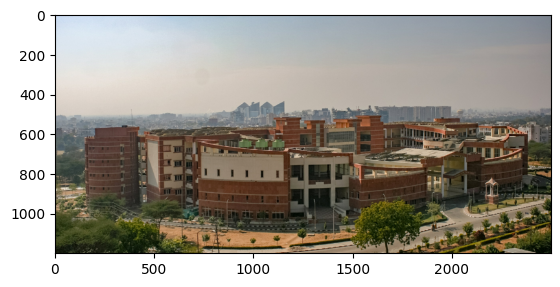

In [18]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [19]:
style_image.shape

TensorShape([1, 180, 270, 3])

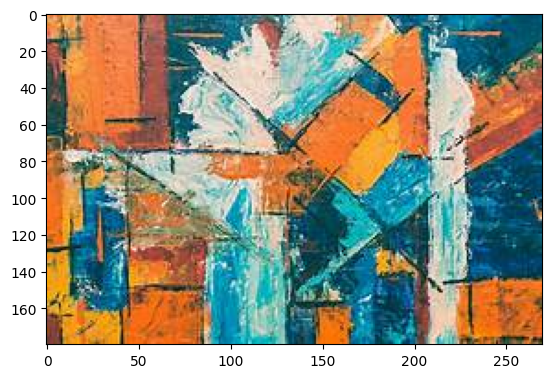

In [20]:
plt.imshow(np.squeeze(style_image))
plt.show()

*stylize image*

In [21]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

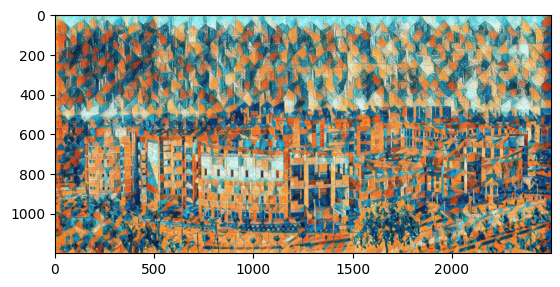

In [22]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [23]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True